In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor

import warnings
warnings.filterwarnings('ignore')


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
 df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/linear_regression/dataset/scrap price.csv')

In [5]:
df.sample(5)

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
30,31,2,honda civic,gas,std,two,hatchback,fwd,front,86.6,...,92,1bbl,2.91,3.41,9.6,58,4800,49,54,6479.0
191,192,0,volkswagen rabbit,gas,std,four,sedan,fwd,front,100.4,...,136,mpfi,3.19,3.40,8.5,110,5500,19,24,13295.0
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
63,64,0,mazda glc deluxe,diesel,std,four,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64,4650,36,42,10795.0
160,161,0,toyota corona,gas,std,four,sedan,fwd,front,95.7,...,98,2bbl,3.19,3.03,9.0,70,4800,38,47,7738.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   name              205 non-null    object 
 3   fueltypes         205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumbers       205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheels       205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
df.shape

(205, 26)

In [8]:
df.describe()

,ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
df.isnull().sum()

ID                  0
symboling           0
name                0
fueltypes           0
aspiration          0
doornumbers         0
carbody             0
drivewheels         0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.nunique()

ID                  205
symboling             6
name                147
fueltypes             2
aspiration            2
doornumbers           2
carbody               5
drivewheels           3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [12]:
categorical_columns = ['fueltypes','aspiration','doornumbers','carbody','drivewheels','enginelocation','enginetype','cylindernumber','fuelsystem']
for col in categorical_columns:

  print(f"Category in {col} is : {df[col].unique()}")


Category in fueltypes is : ['gas' 'diesel']
Category in aspiration is : ['std' 'turbo']
Category in doornumbers is : ['two' 'four']
Category in carbody is : ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
Category in drivewheels is : ['rwd' 'fwd' '4wd']
Category in enginelocation is : ['front' 'rear']
Category in enginetype is : ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
Category in cylindernumber is : ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
Category in fuelsystem is : ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


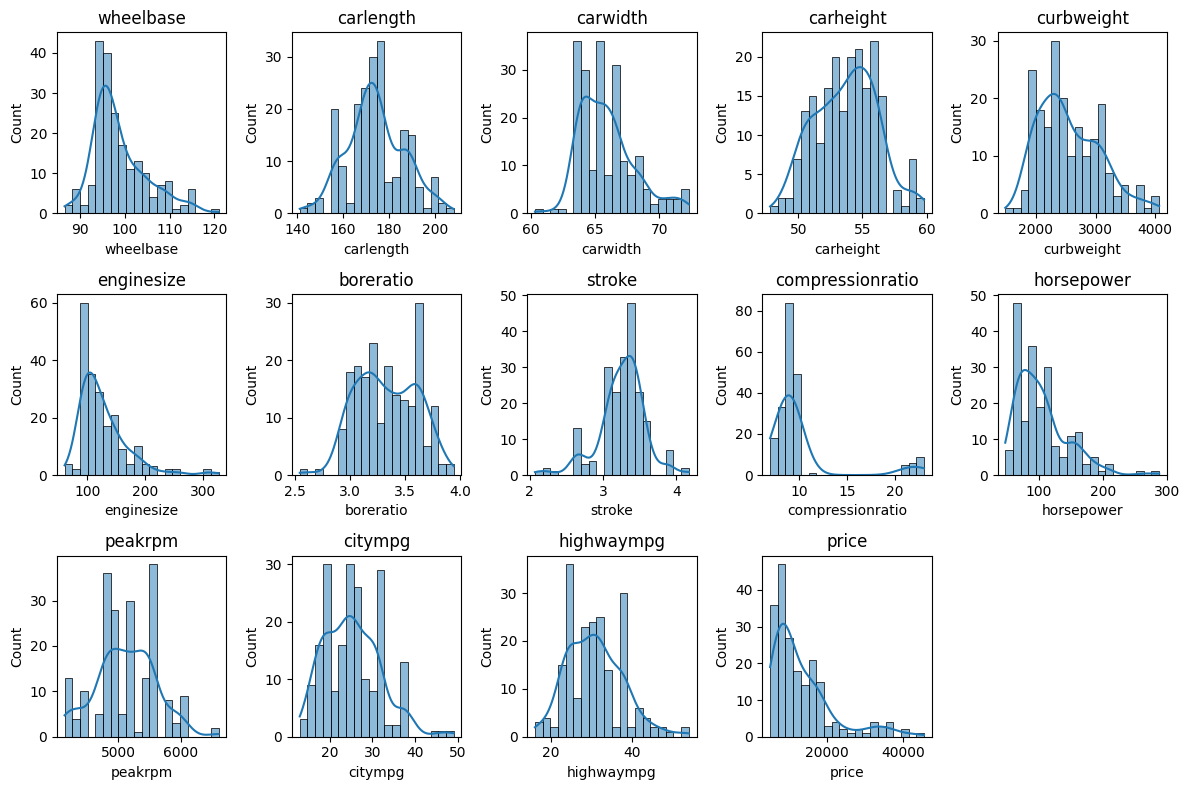

In [13]:
# Distribution of Numerical Features
numerical_features = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                      'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                      'peakrpm', 'citympg', 'highwaympg', 'price']

plt.figure(figsize=(12, 8))
for feature in numerical_features:
    plt.subplot(3, 5, numerical_features.index(feature) + 1)
    sns.histplot(data=df[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()


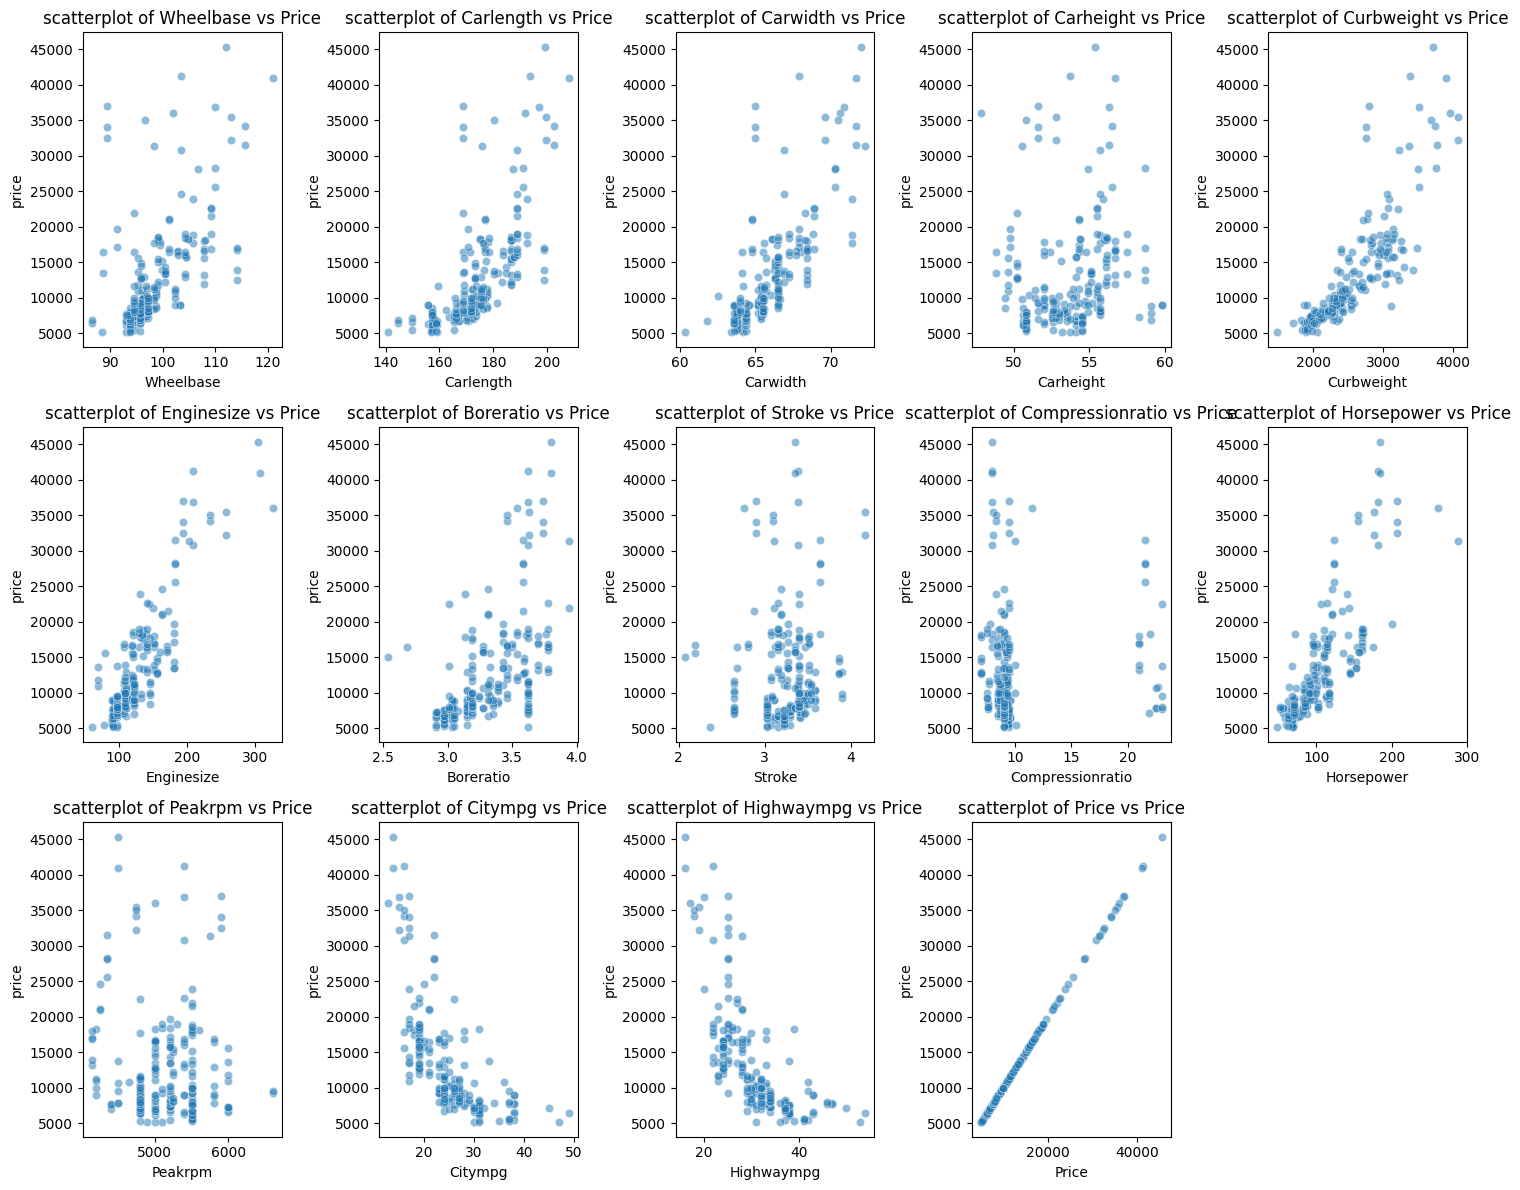

In [15]:
plt.figure(figsize=(15,12))
for i , feature in enumerate(numerical_features):
  plt.subplot(3,5,i+1)
  sns.scatterplot(data=df,x=feature,y='price',alpha=0.5)
  plt.title(f'scatterplot of {feature.capitalize()} vs Price')
  plt.xlabel(feature.capitalize())
  plt.ylabel('price')
plt.tight_layout()
plt.show()

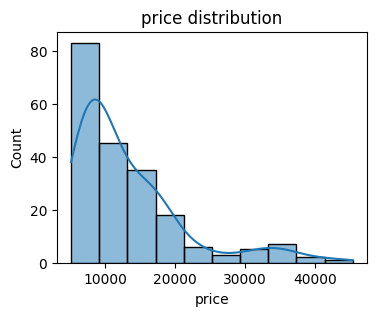

In [16]:
# price analysis
plt.figure(figsize=(4,3))
sns.histplot(data=df['price'],bins=10,kde=True)
plt.title('price distribution')
plt.show()


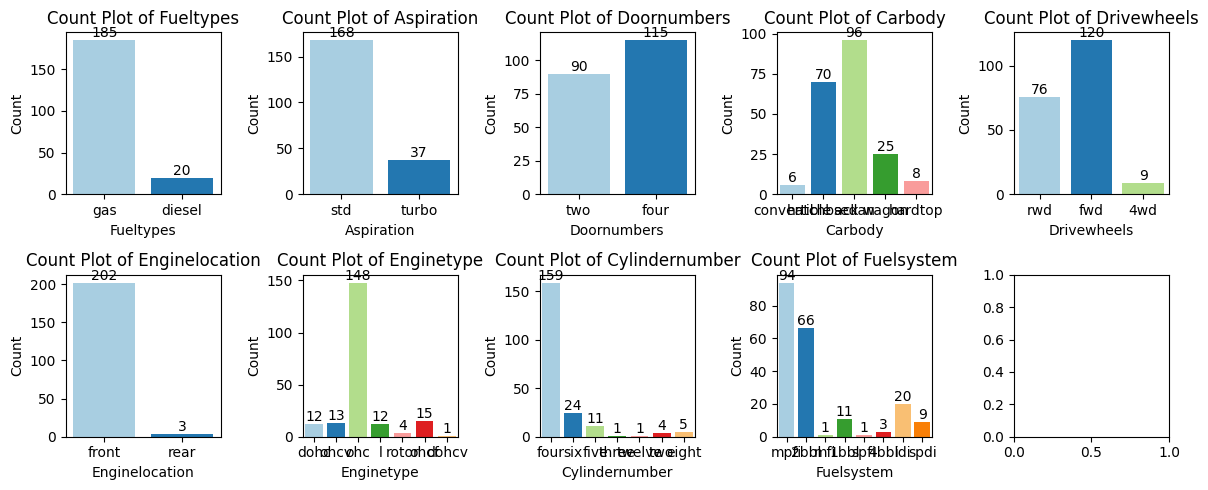

In [17]:
# Calculate the number of rows and columns needed for subplots
num_cols = min(len(categorical_columns), 5)
num_rows = (len(categorical_columns) - 1) // num_cols + 1

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, num_rows * 2.5))
axes = axes.ravel()  # Flatten the 2D array of axes

# Loop through each categorical column
for i, column in enumerate(categorical_columns):
    if i < len(categorical_columns):
        sns.countplot(x=df[column], data=df, palette='Paired', ax=axes[i], saturation=0.95)
        for container in axes[i].containers:
            axes[i].bar_label(container, color='black', size=10)
        axes[i].set_title(f'Count Plot of {column.capitalize()}')
        axes[i].set_xlabel(column.capitalize())
        axes[i].set_ylabel('Count')
    else:
        axes[i].axis('off')

# Adjust layout and show plots
plt.tight_layout()
plt.show()


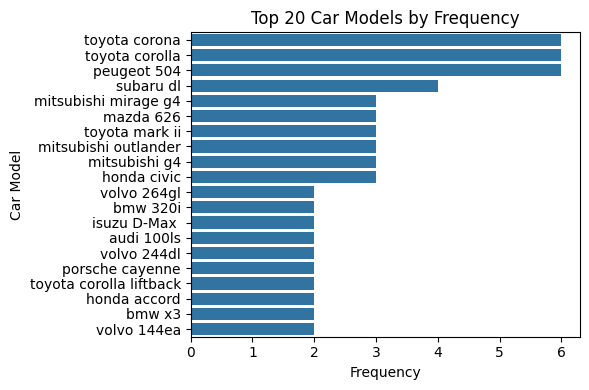

In [18]:
n = 20  # Number of top car models to plot
top_car_models = df['name'].value_counts().head(n)

plt.figure(figsize=(6, 4))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()


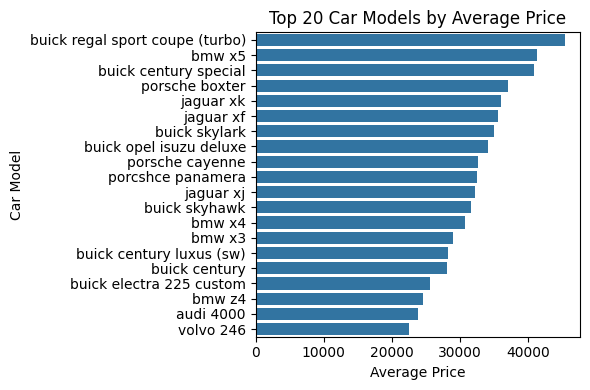

In [19]:
# Calculate average price for each car model
avg_prices_by_car = df.groupby('name')['price'].mean().sort_values(ascending=False)

# Plot top N car models by average price
n = 20  # Number of top car models to plot
top_car_models = avg_prices_by_car.head(n)

plt.figure(figsize=(6, 4))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()


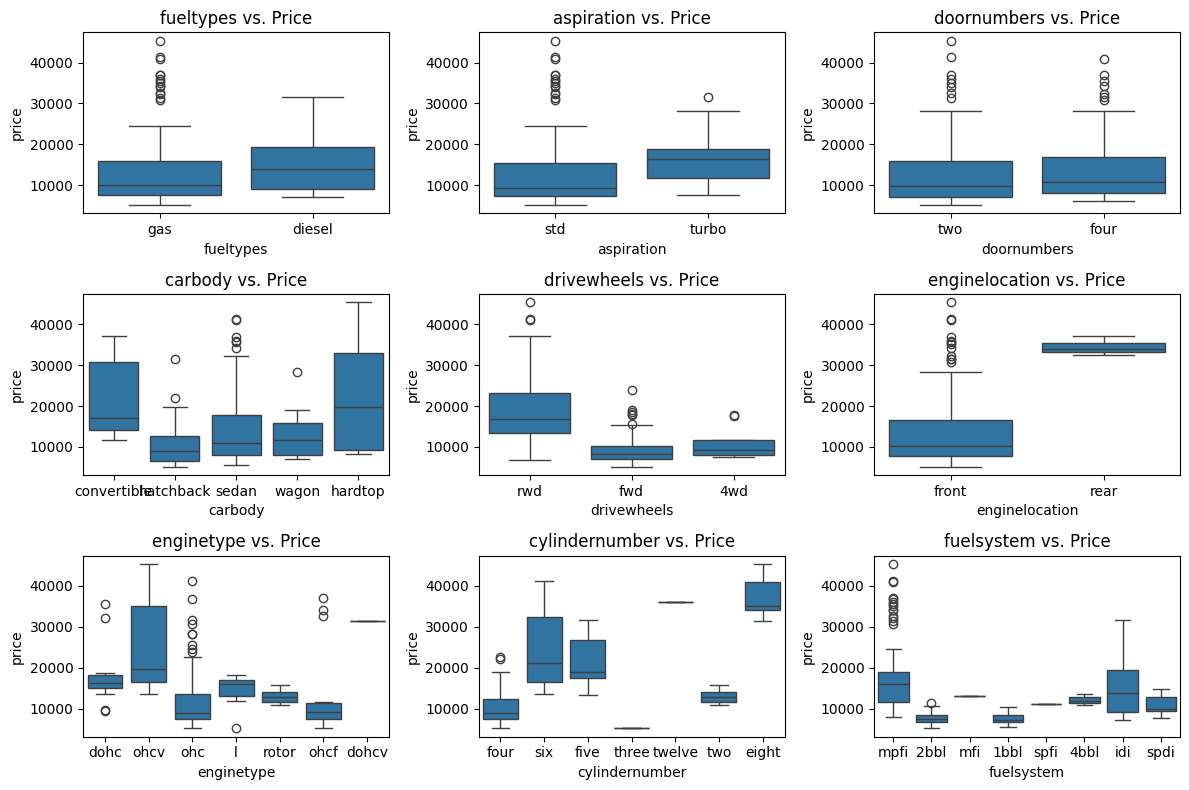

In [20]:
# Categorical Feature vs. Price
plt.figure(figsize=(12, 8))
for feature in categorical_columns:
    plt.subplot(3, 3, categorical_columns.index(feature) + 1)
    sns.boxplot(data=df, x=feature, y='price')
    plt.title(f'{feature} vs. Price')
plt.tight_layout()
plt.show()


In [21]:
df.corr(numeric_only=True)*100

,ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
ID,100.000000,-15.162114,12.972878,17.063639,5.238661,25.596004,7.196156,-3.392984,26.006368,-16.082362,15.027591,-1.500557,-20.378920,1.594004,1.125532,-10.909334
symboling,-15.162114,100.000000,-53.195368,-35.761152,-23.291906,-54.103820,-22.769059,-10.578971,-13.005136,-0.873514,-17.851508,7.087272,27.360625,-3.582263,3.460600,-7.997822
wheelbase,12.972878,-53.195368,100.000000,87.458748,79.514364,58.943476,77.638633,56.932868,48.874988,16.095905,24.978585,35.329448,-36.046875,-47.041361,-54.408192,57.781560
carlength,17.063639,-35.761152,87.458748,100.000000,84.111827,49.102946,87.772846,68.335987,60.645436,12.953261,15.841371,55.262297,-28.724220,-67.090866,-70.466160,68.292002
carwidth,5.238661,-23.291906,79.514364,84.111827,100.000000,27.921032,86.703246,73.543340,55.914991,18.294169,18.112863,64.073208,-22.001230,-64.270434,-67.721792,75.932530
carheight,25.596004,-54.103820,58.943476,49.102946,27.921032,100.000000,29.557173,6.714874,17.107092,-5.530667,26.121423,-10.880206,-32.041072,-4.863963,-10.735763,11.933623
curbweight,7.196156,-22.769059,77.638633,87.772846,86.703246,29.557173,100.000000,85.059407,64.847975,16.879004,15.136174,75.073925,-26.624318,-75.741378,-79.746479,83.530488
enginesize,-3.392984,-10.578971,56.932868,68.335987,73.543340,6.714874,85.059407,100.000000,58.377433,20.312859,2.897136,80.976865,-24.465983,-65.365792,-67.746991,87.414480
boreratio,26.006368,-13.005136,48.874988,60.645436,55.914991,17.107092,64.847975,58.377433,100.000000,-5.590898,0.519734,57.367682,-25.497553,-58.453172,-58.701178,55.317324
stroke,-16.082362,-0.873514,16.095905,12.953261,18.294169,-5.530667,16.879004,20.312859,-5.590898,100.000000,18.611011,8.093954,-6.796375,-4.214475,-4.393093,7.944308


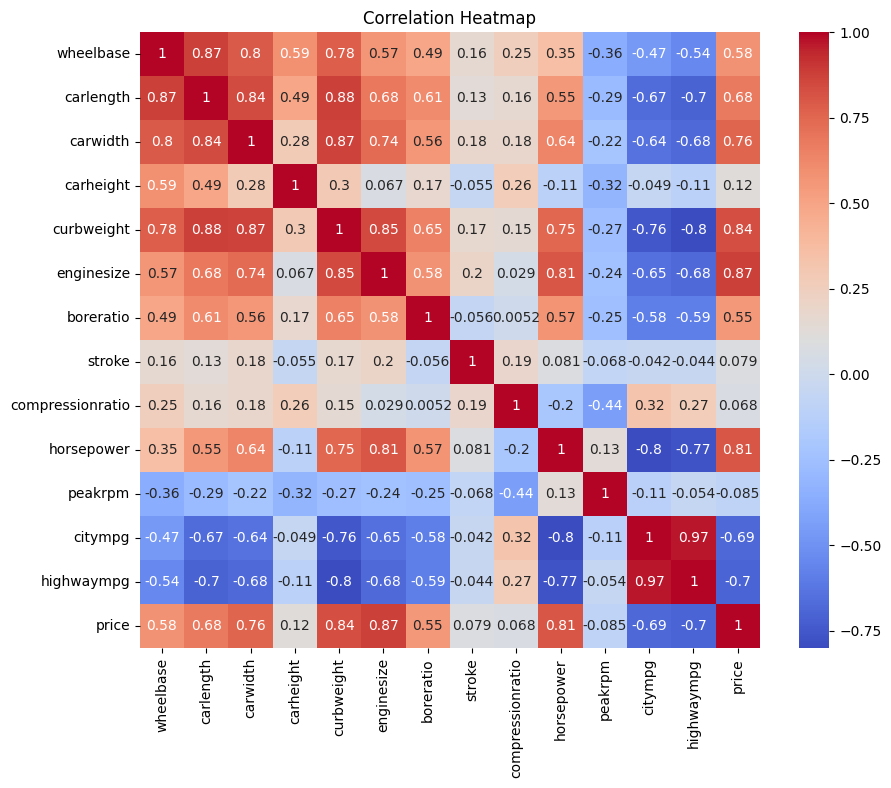

In [22]:
# Correlation Analysis
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [25]:
# Extract brand and model from CarName
df['brand'] = df['name'].apply(lambda x: x.split(' ')[0])
df['model'] = df['name'].apply(lambda x: ' '.join(x.split(' ')[1:]))

# Define categorical and numerical columns
categorical_columns = ['fueltypes', 'aspiration', 'doornumbers', 'carbody', 'drivewheels',
                       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'brand', 'model']
numerical_columns = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                     'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                     'peakrpm', 'citympg', 'highwaympg']

# Encoding categorical variables
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Feature engineering
df['power_to_weight_ratio'] = df['horsepower'] / df['curbweight']
df.sample(5)

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand,model,power_to_weight_ratio
94,95,1,nissan leaf,1,0,1,3,1,0,94.5,...,3.29,9.4,69,5200,31,37,7299.0,14,91,0.035366
144,145,0,subaru r1,1,0,0,3,0,0,97.0,...,2.64,9.0,82,4800,24,25,9233.0,21,108,0.034382
39,40,0,honda prelude,1,0,0,3,1,0,96.5,...,3.58,9.0,86,5800,27,33,8845.0,7,107,0.037326
131,132,2,renault 5 gtl,1,0,1,2,1,0,96.1,...,3.90,8.7,90,5100,23,31,9895.0,19,15,0.036585
121,122,1,plymouth satellite custom (sw),1,0,0,3,1,0,93.7,...,3.23,9.4,68,5500,31,38,6692.0,16,119,0.034188


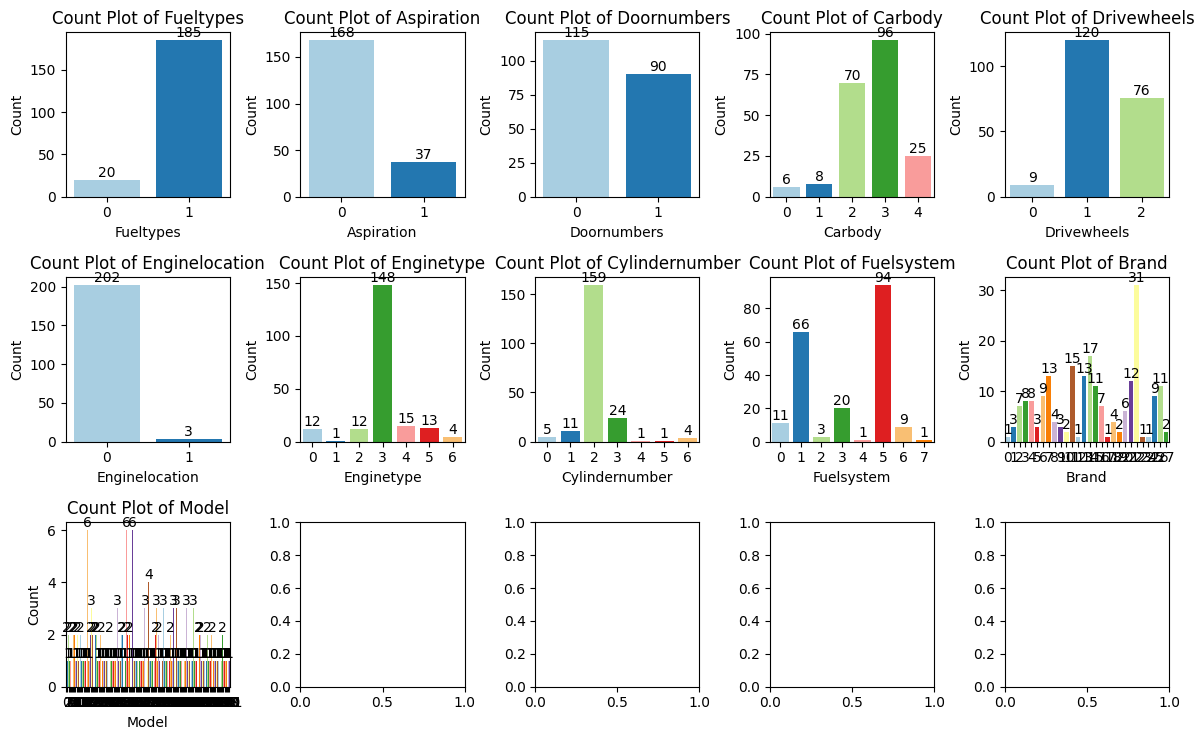

In [33]:
# Calculate the number of rows and columns needed for subplots
num_cols = min(len(categorical_columns), 5)
num_rows = (len(categorical_columns) - 1) // num_cols + 1

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, num_rows * 2.5))
axes = axes.ravel()  # Flatten the 2D array of axes

# Loop through each categorical column
for i, column in enumerate(categorical_columns):
    if i < len(categorical_columns):
        sns.countplot(x=df[column], data=df, palette='Paired', ax=axes[i], saturation=0.95)
        for container in axes[i].containers:
            axes[i].bar_label(container, color='black', size=10)
        axes[i].set_title(f'Count Plot of {column.capitalize()}')
        axes[i].set_xlabel(column.capitalize())
        axes[i].set_ylabel('Count')
    else:
        axes[i].axis('off')

# Adjust layout and show plots
plt.tight_layout()
plt.show()


In [35]:
# Splitting the dataset
X = df.drop(['price', 'name','ID'], axis=1)  # Include the engineered features and CarName
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Create and fit the simple linear regression model as baseline
slr_model = LinearRegression()
slr_model.fit(X_train, y_train)

# Make predictions on training and testing data
y_train_pred = slr_model.predict(X_train)
y_test_pred = slr_model.predict(X_test)

# Calculate R-squared and mean squared error for evaluation

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)


print(f"Training R-squared: {r2_train:.4f}, Training MSE: {mse_train:.4f}")
print(f"Testing R-squared: {r2_test:.4f}, Testing MSE: {mse_test:.4f}")


Training R-squared: 0.9156, Training MSE: 5035232.8171
Testing R-squared: 0.8498, Testing MSE: 11856704.1656


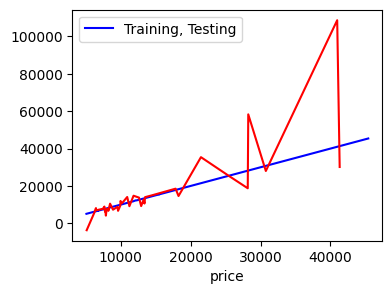

In [43]:
plt.figure(figsize=(4,3))
sns.lineplot(x=y_train,y=y_train_pred,color='blue')
sns.lineplot(x=y_test,y=y_test_pred,color='red')
plt.legend(['Training, Testing'])
plt.show()

In [45]:
# Polynomial degrees
degrees = [4,5]

# Create and fit the polynomial regression models with different degrees
polynomial_models = []
polynomial_r2_train_scores = []
polynomial_r2_test_scores = []

for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    polynomial_models.append(model)

    # Make predictions on training and testing data
    y_train_pred_poly = model.predict(X_train_poly)
    y_test_pred_poly = model.predict(X_test_poly)

    # Calculate R-squared for evaluation
    polynomial_r2_train = r2_score(y_train, y_train_pred_poly)
    polynomial_r2_test = r2_score(y_test, y_test_pred_poly)

    polynomial_r2_train_scores.append(polynomial_r2_train)
    polynomial_r2_test_scores.append(polynomial_r2_test)


    polynomial_MSE_train = mean_squared_error(y_train, y_train_pred_poly)
    polynomial_MSE_test = mean_squared_error(y_test, y_test_pred_poly)

# Find the best degree based on the testing R-squared score
best_degree = degrees[np.argmax(polynomial_r2_test_scores)]

print(f"\nPolynomial Linear Regression:")
print(f"Best Degree: {best_degree}")
print(f"Training R-squared: {polynomial_r2_train_scores}")
print(f"Testing R-squared: {polynomial_r2_test_scores}")



Polynomial Linear Regression:
Best Degree: 5
Training R-squared: [1.0, 1.0]
Testing R-squared: [-1.914092463552774, -0.28405067421214625]


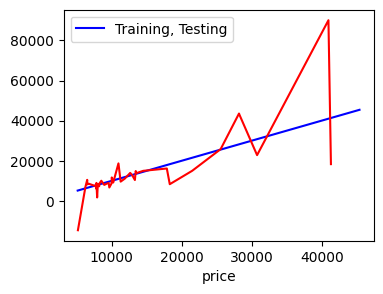

In [46]:
plt.figure(figsize=(4,3))
sns.lineplot(x=y_train,y=y_train_pred_poly,color='blue')
sns.lineplot(x=y_test,y=y_test_pred_poly,color='red')
plt.legend(['Training, Testing'])
plt.show()

In [47]:
from sklearn.linear_model import SGDRegressor

sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_train, y_train)
y_train_pred_sgd = sgdr.predict(X_train)
y_test_pred_sgd = sgdr.predict(X_test)

# Calculate R-squared and mean squared error for evaluation
sgdr_r2_train = r2_score(y_train, y_train_pred_sgd)
sgdr_r2_test = r2_score(y_test, y_test_pred_sgd)
sgdr_mse_train = mean_squared_error(y_train, y_train_pred_sgd)
sgdr_mse_test = mean_squared_error(y_test, y_test_pred_sgd)



print(f"\nSGDRegressor (SGD):")
print(f"Training R-squared: {sgdr_r2_train:.4f}, Training MSE: {sgdr_mse_train:.4f}")
print(f"Testing R-squared: {sgdr_r2_test:.4f}, Testing MSE: {sgdr_mse_test:.4f}")



SGDRegressor (SGD):
Training R-squared: 0.9067, Training MSE: 5563827.0632
Testing R-squared: 0.8464, Testing MSE: 12123922.8994


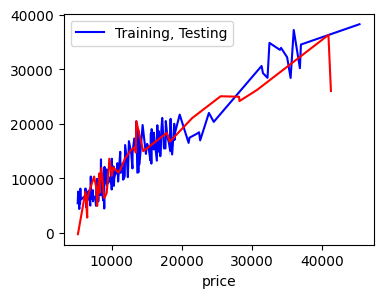

In [48]:
plt.figure(figsize=(4,3))
sns.lineplot(x=y_train,y=y_train_pred_poly,color='blue')
sns.lineplot(x=y_test,y=y_test_pred_poly,color='red')
plt.legend(['Training, Testing'])
plt.show()

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest Regression model
rf_model = RandomForestRegressor(random_state=42)

# Create GridSearchCV object with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Make predictions on training and testing data using the best estimator
y_train_pred_rf = best_estimator.predict(X_train)
y_test_pred_rf = best_estimator.predict(X_test)

# Calculate R-squared and mean squared error for evaluation
rf_r2_train = r2_score(y_train, y_train_pred_rf)
rf_r2_test = r2_score(y_test, y_test_pred_rf)
rf_mse_train = mean_squared_error(y_train, y_train_pred_rf)
rf_mse_test = mean_squared_error(y_test, y_test_pred_rf)

print("Best Parameters:", best_params)
print(f"\nRandom Forest Regression (Bagging):")
print(f"Training R-squared: {rf_r2_train:.4f}, Training MSE: {rf_mse_train:.4f}")
print(f"Testing R-squared: {rf_r2_test:.4f}, Testing MSE: {rf_mse_test:.4f}")


Best Parameters: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}

Random Forest Regression (Bagging):
Training R-squared: 0.9831, Training MSE: 1009068.2845
Testing R-squared: 0.8900, Testing MSE: 8686267.7284


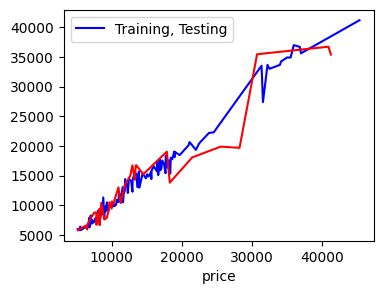

In [51]:
plt.figure(figsize=(4,3))
sns.lineplot(x=y_train,y=y_train_pred_rf,color='blue')
sns.lineplot(x=y_test,y=y_test_pred_rf,color='red')
plt.legend(['Training, Testing'])
plt.show()

In [52]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the parameter grid
param_grid = {
    'n_estimators': [500, 1000],
    'learning_rate': [0.01, 0.02],
    'max_depth': [3, 5]
}

# Create the Gradient Boosting Regression model
gb_model = GradientBoostingRegressor(random_state=42)

# Initialize KFold cross-validator
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Create GridSearchCV object with cross-validation
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Make predictions on training and testing data using the best estimator
y_train_pred_gb = best_estimator.predict(X_train)
y_test_pred_gb = best_estimator.predict(X_test)

# Calculate R-squared and mean squared error for evaluation
gb_r2_train = r2_score(y_train, y_train_pred_gb)
gb_r2_test = r2_score(y_test, y_test_pred_gb)
gb_mse_train = mean_squared_error(y_train, y_train_pred_gb)
gb_mse_test = mean_squared_error(y_test, y_test_pred_gb)

print("Best Parameters:", best_params)
print(f"\nGradient Boosting Regression (Boosting):")
print(f"Training R-squared: {gb_r2_train:.4f}, Training MSE: {gb_mse_train:.4f}")
print(f"Testing R-squared: {gb_r2_test:.4f}, Testing MSE: {gb_mse_test:.4f}")


Best Parameters: {'learning_rate': 0.02, 'max_depth': 3, 'n_estimators': 500}

Gradient Boosting Regression (Boosting):
Training R-squared: 0.9946, Training MSE: 321446.0692
Testing R-squared: 0.9144, Testing MSE: 6761369.1647


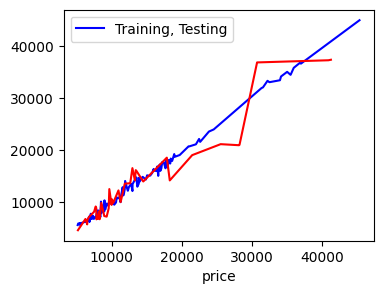

In [53]:
plt.figure(figsize=(4,3))
sns.lineplot(x=y_train,y=y_train_pred_gb,color='blue')
sns.lineplot(x=y_test,y=y_test_pred_gb,color='red')
plt.legend(['Training, Testing'])
plt.show()